## This is a KNN classification algorithm that aims to best classify images from the MNIST Dataset 

In [ ]:
#Relevant imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math
import cv2 as cv
import numpy as np
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from collections import Counter
import os

## What is this?
This is a particular implementation of the KNN algorithm for classifying images in the MNIST dataset. Here, a eculidean distance metric is used.

In [ ]:
#train will serve as D Private 
train = pd.read_csv("/content/mnist_train.csv")
test = pd.read_csv("/content/mnist_test.csv")

x = np.random.binomial(len(train),.05)
#Do poisson sampling
sample = train.sample(n = x)

global X_train, X_test, y_train, y_test
#set up test train data
X_train = sample.drop(columns='label')

X_test = test.drop(columns = 'label')

y_train = sample['label']

y_test = test['label']

y_test = y_test.to_numpy()

X_test = X_test.to_numpy()

y_train = y_train.to_numpy()

X_train = X_train.to_numpy()



In [ ]:
#Euclidean distance betweeen two arrays
# np.sum((row1 - row2)**2 )
def shortestDistance(row1, row2):
        return math.sqrt(np.sum((row1-row2)**2))

In [ ]:
#KNN driver, return the 
#pass index of the training point and the distances between all the other clusters
#iterator construct?
# N = number of images in the dataset,
# K number of neighbors
def knn(train_x, train_y, point, k):
    #List to store distances
    distances =[]
    
    #List to store neighbors
    k_nearest_neighbors = []
    
    #Variable to increment along the training set labels
    i = 0
    
    #iterate over the training set
    for training_point in train_x:
        #Add the euclidean distance between the training point and test point 
        distances.append((shortestDistance(training_point,point),train_y[i]))
        #Increment over the testing set 
        i = i+1
    #sort the distances
    sorted_distances = sorted(distances, key = lambda x:x[0])
    #Get the top k matches
    for i in range(k):
        k_nearest_neighbors.append(sorted_distances.pop(1))
    #Get the frequency using numpy functions, then return the closest label
    k_nearest_neighbors = np.asarray(k_nearest_neighbors)
    frequencies = np.unique(k_nearest_neighbors[:,1],return_counts = True)
    labels,counts = frequencies
    maj = labels[counts.argmax()]
    return maj

In [ ]:
#Driver class as to run the KNN algorithm
#Keep track of a confusion matrix: 0-9, measure the number of the counts of decisions.
#Iterate over pairs, run the prediction to lessen memory usage.
def main(k):
    counter = 0
    noised_predictions = []
    actual_predictions = []
    rejected = []
    right = 0

    #Iterate over the test set to make predictions
    for element in X_test:
        #make a prediction using a KNN
        pred = knn(X_train, y_train,element,k)
        actual_predictions.append(pred)
        if pred == y_test[counter]:
            right = right+1
        noise = np.random.normal(0, 1, 1)
        pred = pred + noise
        if pred > 0.6*k:
            noised_predictions.append(pred)
        else:
            rejected.append(pred)
        counter = counter+1
    #print("Confusion Matrix \n")
    #confusion_matrix(actual_predictions,y_test)
    return 100*(right/y_test.shape[0])

In [ ]:
#import time
#x = main(5)
#print(x)
#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))

--- 2982.863818883896 seconds ---


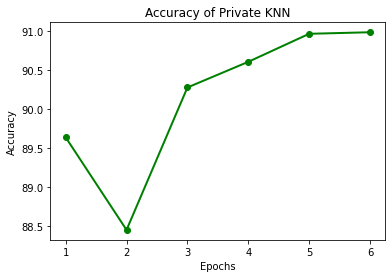

In [ ]:
#Call the driver function
import time
preds = []
epochs = list(range(1,7))
start_time = time.time()
fig,ax = plt.subplots()
for i in range(1,7):
  acc = main(i)
  preds.append(acc)
ax.plot(epochs,preds, 'go-', linewidth = 2)
ax.set(xlabel = 'Neighbors', ylabel = 'Accuracy', title = 'Accuracy of Private KNN')     

print("--- %s seconds ---" % (time.time() - start_time))

Other diagnostics:
* number of neighbors when all are diverse
* return some i don't know/abstain as to better improe accuracy, learning with abstention, but unclear with performance

We killed the accuracy lmao 